<a href="https://colab.research.google.com/github/Yedramartinolmos/deeplearning/blob/main/Ejercicio_Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()# Descarga los datos de MNIST

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [4]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)

validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]




In [5]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado

  model = models.Sequential()

  if regularizador == 0:
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
  
  elif regularizador == 1:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28*28,)))

  elif regularizador == 2:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28*28,)))

  elif regularizador == 3:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), activation='relu', input_shape=(28*28,)))

  elif regularizador ==4:
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dropout(0.5))
  

  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado

  else: 
    print('Error el numero debe estar entre 0-4')
    return #cuidado con los indents
  model.add(layers.Dense(10, activation = 'softmax'))
  model.summary()
  return model


In [6]:
def compila_modelo(model): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

In [7]:
def entrena_modelo(model):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  history = model.fit(train_images,train_labels,
                    batch_size=128,
                    epochs=30, validation_data=(validation_images, validation_labels))
  return history


In [8]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [9]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [10]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
print(network0)

In [12]:
network0 = compila_modelo(network0)

In [13]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 6s 6ms/step - loss: 0.2762 - accuracy: 0.9208 - val_loss: 0.1456 - val_accuracy: 0.9577
Epoch 2/30
391/391 [==============================] - 2s 6ms/step - loss: 0.1147 - accuracy: 0.9659 - val_loss: 0.0967 - val_accuracy: 0.9720
Epoch 3/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0759 - accuracy: 0.9776 - val_loss: 0.0853 - val_accuracy: 0.9744
Epoch 4/30
391/391 [==============================] - 3s 7ms/step - loss: 0.0546 - accuracy: 0.9842 - val_loss: 0.0818 - val_accuracy: 0.9764
Epoch 5/30
391/391 [==============================] - 3s 7ms/step - loss: 0.0408 - accuracy: 0.9880 - val_loss: 0.0833 - val_accuracy: 0.9777
Epoch 6/30
391/391 [==============================] - 3s 7ms/step - loss: 0.0304 - accuracy: 0.9912 - val_loss: 0.0765 - val_accuracy: 0.9793
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0232 - accuracy: 0.9931 - val_loss: 0.0781 - val_accuracy: 0.9794
Epoch 

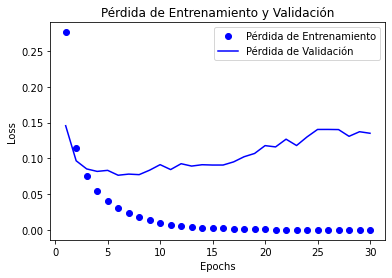

In [14]:
pinta_perdida_entrenamiento_validacion(historia0)

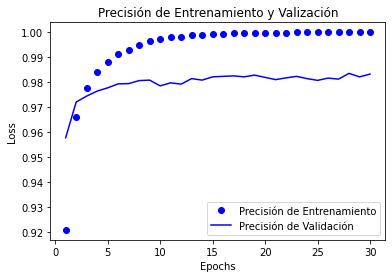

In [15]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [16]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
network1 = compila_modelo(network1)

In [18]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1265 - accuracy: 0.8471 - val_loss: 1.0778 - val_accuracy: 0.8541
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.9617 - accuracy: 0.8814 - val_loss: 0.8717 - val_accuracy: 0.8958
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8417 - accuracy: 0.9014 - val_loss: 0.8184 - val_accuracy: 0.9122
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7636 - accuracy: 0.9152 - val_loss: 0.6827 - val_accuracy: 0.9340
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7125 - accuracy: 0.9230 - val_loss: 0.6860 - val_accuracy: 0.9302
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6766 - accuracy: 0.9300 - val_loss: 0.6440 - val_accuracy: 0.9361
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6489 - accuracy: 0.9342 - val_loss: 0.6098 - val_accuracy: 0.9468
Epoch 

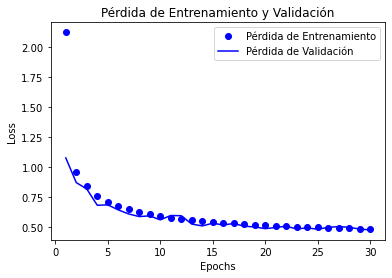

In [19]:
pinta_perdida_entrenamiento_validacion(historia1)

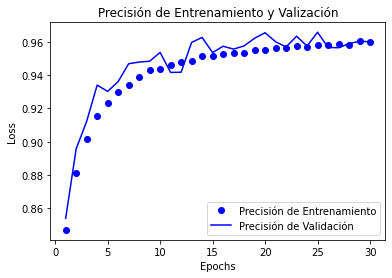

In [20]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [21]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
network2 = compila_modelo(network2)

In [23]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5272 - accuracy: 0.9111 - val_loss: 0.2951 - val_accuracy: 0.9554
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.2625 - accuracy: 0.9552 - val_loss: 0.2212 - val_accuracy: 0.9617
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2108 - accuracy: 0.9636 - val_loss: 0.1854 - val_accuracy: 0.9677
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1857 - accuracy: 0.9670 - val_loss: 0.1929 - val_accuracy: 0.9650
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1739 - accuracy: 0.9693 - val_loss: 0.2247 - val_accuracy: 0.9509
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1642 - accuracy: 0.9718 - val_loss: 0.1806 - val_accuracy: 0.9672
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1570 - accuracy: 0.9734 - val_loss: 0.1660 - val_accuracy: 0.9685
Epoch 

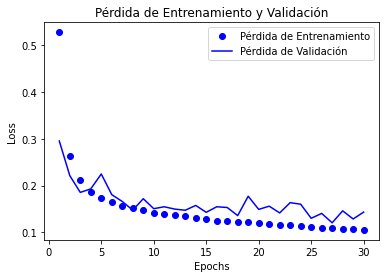

In [24]:
pinta_perdida_entrenamiento_validacion(historia2)

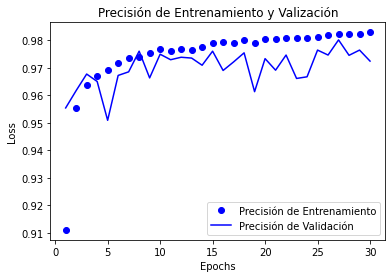

In [25]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [26]:
network3 = crea_modelo(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
network3 = compila_modelo(network3)

In [28]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 2.1608 - accuracy: 0.8420 - val_loss: 1.0693 - val_accuracy: 0.8773
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9734 - accuracy: 0.8793 - val_loss: 0.9027 - val_accuracy: 0.8910
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.8568 - accuracy: 0.8980 - val_loss: 0.8755 - val_accuracy: 0.8915
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7851 - accuracy: 0.9108 - val_loss: 0.7053 - val_accuracy: 0.9351
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7342 - accuracy: 0.9202 - val_loss: 0.6890 - val_accuracy: 0.9390
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6960 - accuracy: 0.9276 - val_loss: 0.6441 - val_accuracy: 0.9448
Epoch 7/30
391/391 [==============================] - 2s 6ms/step - loss: 0.6669 - accuracy: 0.9324 - val_loss: 0.6376 - val_accuracy: 0.9400
Epoch 

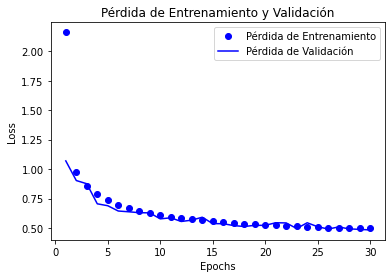

In [29]:
pinta_perdida_entrenamiento_validacion(historia3)

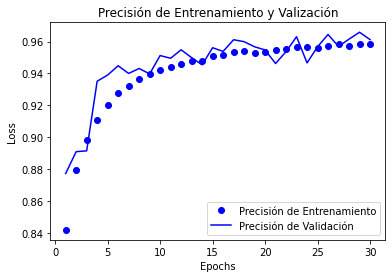

In [30]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [31]:
network4 = crea_modelo(4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [32]:
network4 = compila_modelo(network4)

In [33]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3465 - accuracy: 0.9003 - val_loss: 0.1629 - val_accuracy: 0.9564
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1673 - accuracy: 0.9508 - val_loss: 0.1314 - val_accuracy: 0.9622
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1290 - accuracy: 0.9617 - val_loss: 0.0973 - val_accuracy: 0.9728
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1071 - accuracy: 0.9673 - val_loss: 0.0869 - val_accuracy: 0.9754
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0935 - accuracy: 0.9716 - val_loss: 0.0837 - val_accuracy: 0.9748
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9752 - val_loss: 0.0807 - val_accuracy: 0.9775
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0742 - accuracy: 0.9773 - val_loss: 0.0786 - val_accuracy: 0.9788
Epoch 

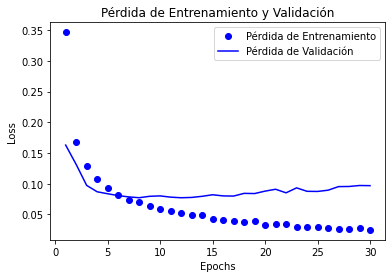

In [34]:
pinta_perdida_entrenamiento_validacion(historia4)

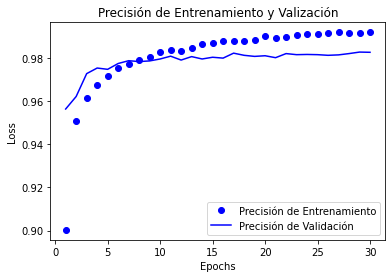

In [35]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [36]:
network5 = crea_modelo(5)

Error el numero debe estar entre 0-4


### CONCLUSIONES

Uno de los objetivos de este ejercicio es comparar regularizadores y analizar su comportamiento.

¿Qué es la regularización?

La regularización en una red neuronal es una técnica que podemos utilizar para reducir el sobreajuste en nuestro modelo de red neuronal con el objetivo final de optimizar este mismo.

A continuación mostraremos la precisión máxima que obtuvo el modelo según el regularizador que se usó en cada caso al igual que la época donde ésta se consiguió.

*   Caso 0 (Sin Regulizadores)        
      - Epoch 28/30 - val_accuracy: 0.9835
*   Caso 1 (Regularizador l1)
      - Epoch 25/30 - val_accuracy: 0.9657
*   Caso 2 (Regularizador l2)
      - Epoch 27/30 - val_accuracy: 0.9801  
*   Caso 3 (Regularizador l1_l2
      - Epoch 29/30 - val_accuracy: 0.9658
*   Caso 4 (Usando Dropout)
      - Epoch 29/30 - val_accuracy: 0.9828


Pero no son los únicos datos en los que nos hemos de fijar puesto que si aquí nos parasemos, parecería que la mejor opción sería no usar un regulizador. (Mayor val_accuracy 98.35% vs Dropout 98.28%)

Sin embargo al comparar los datos obtenidos en las gráficas de los casos 4 y 0:

(Caso 4 izqd Caso 0 derecha)

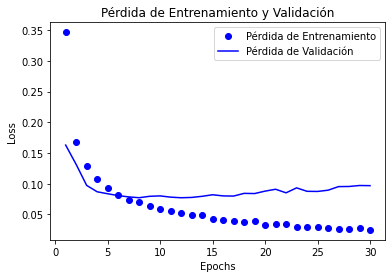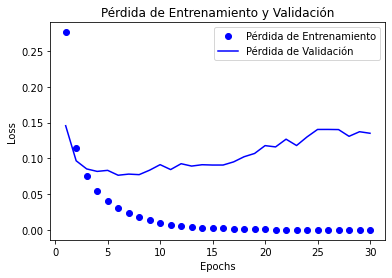

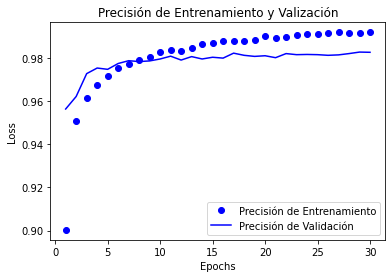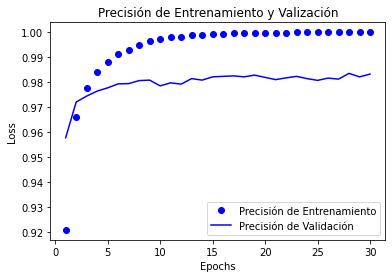

Apreciamos que el regularizador Dropout produce mejores resultados y más uniformes con menor diferencia en la precisión de los datos de entrenamiento y validación al igual que para la pérdida de entrenamiento y validación.